## Exploratory Data Analysis (EDA):


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv', index_col= "ID")
df_test = pd.read_csv('test.csv', index_col= "ID")

In [3]:
df_train.head()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,State,target
ID,,,,,,,,,,,,,,,,,,,,
0,120,2.51,6.60,0,0,9.3,16.69,186.7,4,15.87,98.2,0,146.7,85,99,96,408,2,GA,0
1,94,1.81,8.13,0,0,6.7,30.82,182.4,2,15.50,181.3,0,180.6,108,135,103,415,0,OH,0
2,82,3.00,4.93,0,0,11.1,24.46,194.9,2,16.57,143.9,0,109.6,105,61,94,510,1,DC,0
3,170,2.27,6.05,0,1,8.4,44.18,245.0,3,20.83,259.9,0,134.4,122,68,121,510,3,VA,0
4,93,3.38,3.20,19,0,12.5,23.26,179.5,3,15.26,136.8,1,71.1,105,113,95,510,2,CA,0


There aren't any missing data in the data set.

In [4]:
df_train.isnull().sum().max()

0

In [5]:
df_train.describe()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,101.271333,2.768620,9.039807,8.174333,0.100333,10.252167,30.592697,201.171100,4.479667,17.099747,179.953933,0.278667,200.883233,100.090000,100.325667,99.863667,437.183000,1.561000,0.148333
std,40.085841,0.750316,2.277167,13.747786,0.300494,2.779040,9.236061,50.920075,2.463522,4.328183,54.329868,0.448418,50.602550,19.938599,19.977186,19.675165,42.368761,1.319669,0.355489
min,1.000000,0.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,33.000000,408.000000,0.000000,0.000000
25%,73.750000,2.300000,7.520000,0.000000,0.000000,8.500000,24.475000,166.700000,3.000000,14.170000,143.975000,0.000000,167.000000,87.000000,87.000000,86.000000,408.000000,1.000000,0.000000
50%,101.000000,2.780000,9.075000,0.000000,0.000000,10.300000,30.535000,201.400000,4.000000,17.120000,179.600000,0.000000,201.650000,100.000000,101.000000,100.000000,415.000000,1.000000,0.000000
75%,128.000000,3.270000,10.590000,20.000000,0.000000,12.100000,36.845000,235.225000,6.000000,19.992500,216.725000,1.000000,235.300000,114.000000,114.000000,113.000000,510.000000,2.000000,0.000000
max,243.000000,5.400000,17.770000,51.000000,1.000000,20.000000,59.640000,363.700000,20.000000,30.910000,350.800000,1.000000,395.000000,170.000000,165.000000,175.000000,510.000000,9.000000,1.000000


In [6]:
df_train.variable_17.value_counts()

1    1079
2     673
0     624
3     383
4     147
5      61
6      21
7       8
9       2
8       2
Name: variable_17, dtype: int64

Variable_4, variable_11, variable_16 and variable_17 seem to be of categorical type.

Variable_3, variable_8, variable_13 only take integer values.

Variable_13, variable_14 and variable_15 take very similar values so there could be some duplcation issues here.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   variable_0   3000 non-null   int64  
 1   variable_1   3000 non-null   float64
 2   variable_2   3000 non-null   float64
 3   variable_3   3000 non-null   int64  
 4   variable_4   3000 non-null   int64  
 5   variable_5   3000 non-null   float64
 6   variable_6   3000 non-null   float64
 7   variable_7   3000 non-null   float64
 8   variable_8   3000 non-null   int64  
 9   variable_9   3000 non-null   float64
 10  variable_10  3000 non-null   float64
 11  variable_11  3000 non-null   int64  
 12  variable_12  3000 non-null   float64
 13  variable_13  3000 non-null   int64  
 14  variable_14  3000 non-null   int64  
 15  variable_15  3000 non-null   int64  
 16  variable_16  3000 non-null   int64  
 17  variable_17  3000 non-null   int64  
 18  State        3000 non-null   object 
 19  target

In [8]:
df_train.columns

Index(['variable_0', 'variable_1', 'variable_2', 'variable_3', 'variable_4',
       'variable_5', 'variable_6', 'variable_7', 'variable_8', 'variable_9',
       'variable_10', 'variable_11', 'variable_12', 'variable_13',
       'variable_14', 'variable_15', 'variable_16', 'variable_17', 'State',
       'target'],
      dtype='object')

In [9]:
print('Not responding - ', round(df_train['target'].value_counts()[0]/len(df_train) * 100,2), '% of the dataset')
print('Responding - ', round(df_train['target'].value_counts()[1]/len(df_train) * 100,2), '% of the dataset')

Not responding -  85.17 % of the dataset
Responding -  14.83 % of the dataset


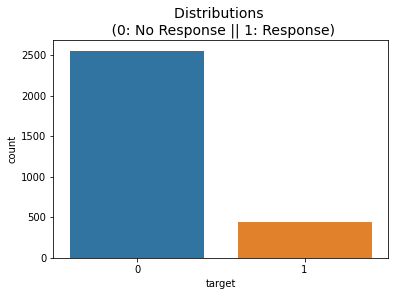

In [10]:
sns.countplot('target', data=df_train)
plt.title('Distributions \n (0: No Response || 1: Response)', fontsize=14);

It is clear that the data is imbalanced. So it should be considered while creating a model in order to prevent
overfitting.

### Looking at the Correlations:

Correlation Matrix

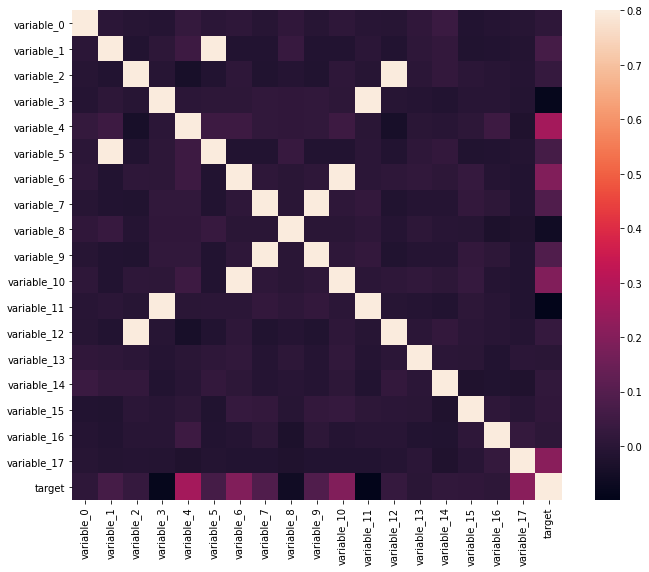

In [11]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

From the correlation matrix it is evident that we have some variables that have linear dependencies with each other, so
the correlation ratio between them is eqaul to 1. This can result in multicolinearity in the model so it would be best to consder 
only one of each pair. The pairs are 
* V_1 and V_5,
* V_2 and V_12,
* V_3 and V_11,
* V_6 and V_10,
* V_7 and V_9.

If we take a closer look at the Target variable, we can see that none of the explanatory varibales has an outstanding effect 
on it. That said, Variables 4,6,10, 17 are the ones with highest correlation with the target variable. As variable 6 and 10
have linear dependency, therefore only one of them will be cosidered.


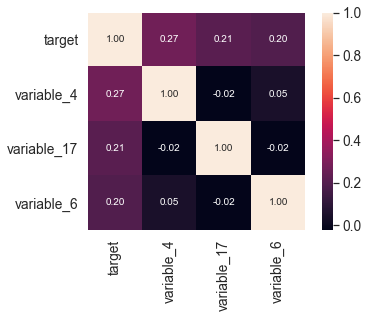

In [12]:
# Zoomed in correlation matrix
k =  4 # Number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


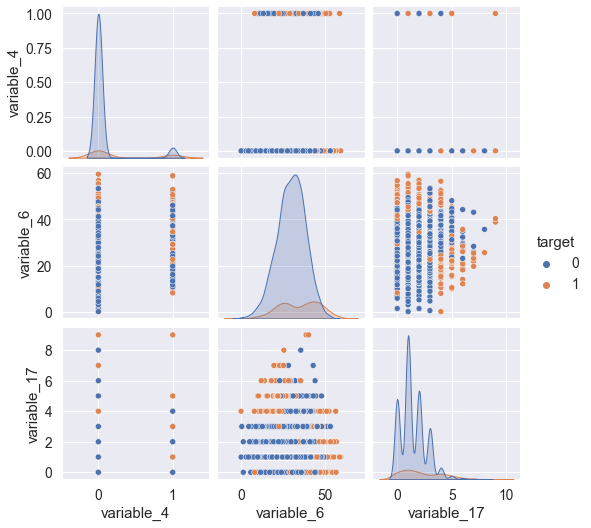

In [13]:
cols = [ 'variable_4', 'variable_6','variable_17']
sns.pairplot(df_train, vars = cols, hue = 'target');

It is hard to make significant conclusions from the pairplot, but it gives an idea about the distribution of target variables.

## Scaling the data

In [14]:
standarad_scaler = StandardScaler()
# Excluding categoric and dummy variables
df_train_t = df_train.drop(['target', 'State', 'variable_4', 'variable_11', 'variable_16'], axis = 1)
df_train_scaled = pd.DataFrame(standarad_scaler.fit_transform(df_train_t))
df_train_scaled.columns = df_train_t.columns
df_train_scaled

,variable_0,variable_1,variable_2,variable_3,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,variable_12,variable_13,variable_14,variable_15,variable_17
0,0.467292,-0.344739,-1.071600,-0.594692,-0.342681,-1.505513,-0.284240,-0.194740,-0.284173,-1.505020,-1.070939,-0.756950,-0.066370,-0.196406,0.332715
1,-0.181424,-1.277835,-0.399601,-0.594692,-1.278412,0.024615,-0.368700,-1.006721,-0.369673,0.024780,-0.400901,0.396784,1.735986,0.159432,-1.183070
2,-0.480832,0.308428,-1.805090,-0.594692,0.305132,-0.664105,-0.123176,-1.006721,-0.122415,-0.663722,-1.804226,0.246297,-1.968857,-0.298073,-0.425177
3,1.714823,-0.664657,-1.313169,-0.594692,-0.666588,1.471360,0.860883,-0.600731,0.861996,1.471739,-1.314051,1.099057,-1.618399,1.074444,1.090607
4,-0.206375,0.814966,-2.564932,0.787579,0.808987,-0.794053,-0.425661,-0.600731,-0.425133,-0.794427,-2.565184,0.246297,0.634546,-0.247239,0.332715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-1.903017,1.494793,0.373418,-0.594692,1.492791,1.152989,0.153774,0.617241,0.154884,1.153261,0.371916,0.848245,-1.568333,-0.908081,0.332715
2996,0.542144,-0.451378,-0.645562,-0.594692,-0.450650,-0.309999,0.947307,2.241203,0.947496,-0.310267,-0.645989,-2.462469,0.934939,-1.162251,-0.425177
2997,-0.630536,-0.091470,-0.693875,1.806095,-0.090754,0.179468,0.228414,0.211250,0.228830,0.179417,-0.695402,-1.760196,-1.718530,0.413602,-0.425177
2998,-2.302227,1.094894,-0.193170,1.660593,1.096905,0.255271,0.028066,-1.006721,0.027788,0.254894,-0.191391,-0.104839,1.485659,0.108598,-0.425177


In [15]:
# Putting together the scaeld variables and the rest of the features
df_train_scaled.insert(4, 'variable_4', df_train['variable_4'])
df_train_scaled.insert(11, 'variable_11', df_train['variable_11'])
df_train_scaled.insert(16, 'variable_16', df_train['variable_16'])
df_train_scaled.insert(18, 'State', df_train['State'])
df_train_scaled.insert(19, 'target', df_train['target'])

In [16]:
df_train_scaled.head()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,State,target
0,0.467292,-0.344739,-1.071600,-0.594692,0,-0.342681,-1.505513,-0.284240,-0.194740,-0.284173,-1.505020,0,-1.070939,-0.756950,-0.066370,-0.196406,408,0.332715,GA,0
1,-0.181424,-1.277835,-0.399601,-0.594692,0,-1.278412,0.024615,-0.368700,-1.006721,-0.369673,0.024780,0,-0.400901,0.396784,1.735986,0.159432,415,-1.183070,OH,0
2,-0.480832,0.308428,-1.805090,-0.594692,0,0.305132,-0.664105,-0.123176,-1.006721,-0.122415,-0.663722,0,-1.804226,0.246297,-1.968857,-0.298073,510,-0.425177,DC,0
3,1.714823,-0.664657,-1.313169,-0.594692,1,-0.666588,1.471360,0.860883,-0.600731,0.861996,1.471739,0,-1.314051,1.099057,-1.618399,1.074444,510,1.090607,VA,0
4,-0.206375,0.814966,-2.564932,0.787579,0,0.808987,-0.794053,-0.425661,-0.600731,-0.425133,-0.794427,1,-2.565184,0.246297,0.634546,-0.247239,510,0.332715,CA,0


In [17]:
# Scaling the Test data
df_test_t = df_test.drop(['State', 'variable_4', 'variable_11', 'variable_16'], axis = 1)
df_test_scaled = pd.DataFrame(standarad_scaler.fit_transform(df_test_t))
df_test_scaled.columns = df_test_t.columns
df_test_scaled.index += 3000



In [18]:
df_test_scaled.insert(4, 'variable_4', df_test['variable_4'])
df_test_scaled.insert(11, 'variable_11', df_test['variable_11'])
df_test_scaled.insert(16, 'variable_16', df_test['variable_16'])
df_test_scaled.insert(18, 'State', df_test['State'])

In [19]:
df_test_scaled

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,State
3000,-1.211532,-0.138135,-1.689350,-0.565510,0,-0.139016,-0.329552,1.327045,1.033682,1.326938,-0.329903,0,-1.690788,-1.837166,-0.116362,-1.752313,408,0.329192,KY
3001,0.450149,0.793846,-1.402270,-0.565510,0,0.791654,-0.732176,-1.624762,-1.015223,-1.624780,-0.732313,0,-1.400614,-0.320240,1.178455,-2.077756,510,1.112199,RI
3002,-0.193082,0.755545,0.770707,-0.565510,0,0.757185,0.117455,1.286048,0.623901,1.285942,0.117418,0,0.769735,-1.382088,-1.986654,0.959716,415,0.329192,CO
3003,-0.889916,0.653410,-1.362520,1.873209,0,0.653777,0.173463,-1.423875,-0.605442,-1.424623,0.173109,1,-1.360864,-0.522497,0.746849,0.580032,408,0.329192,MS
3004,0.986175,-0.099835,0.461543,-0.565510,0,-0.104546,0.473582,0.195519,-1.015223,0.195928,0.473119,0,0.461673,-0.269676,-1.842785,0.905476,510,-1.236822,DC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.798566,1.623692,-0.214199,2.025628,0,1.618916,0.473582,-1.362379,1.853244,-1.361923,0.473119,1,-0.212089,0.640480,-1.075486,0.796994,415,0.329192,MD
3329,-1.720757,-0.482840,0.245129,-0.565510,0,-0.483708,-1.303880,1.208153,-0.605442,1.208772,-1.303590,0,0.245035,1.449507,1.322324,-1.372629,415,-1.236822,MA
3330,2.487049,0.449141,0.231879,-0.565510,0,0.446962,0.122739,0.525548,-0.605442,0.526308,0.122807,0,0.231123,-0.117983,-0.643880,0.146108,415,0.329192,CO
3331,-1.050724,1.725827,0.479210,-0.565510,0,1.722324,0.449276,0.748983,0.623901,0.748169,0.449765,0,0.479560,1.550636,-0.116362,0.525792,510,0.329192,ND


In [20]:
df_test_scaled.head()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,State
3000,-1.211532,-0.138135,-1.689350,-0.565510,0,-0.139016,-0.329552,1.327045,1.033682,1.326938,-0.329903,0,-1.690788,-1.837166,-0.116362,-1.752313,408,0.329192,KY
3001,0.450149,0.793846,-1.402270,-0.565510,0,0.791654,-0.732176,-1.624762,-1.015223,-1.624780,-0.732313,0,-1.400614,-0.320240,1.178455,-2.077756,510,1.112199,RI
3002,-0.193082,0.755545,0.770707,-0.565510,0,0.757185,0.117455,1.286048,0.623901,1.285942,0.117418,0,0.769735,-1.382088,-1.986654,0.959716,415,0.329192,CO
3003,-0.889916,0.653410,-1.362520,1.873209,0,0.653777,0.173463,-1.423875,-0.605442,-1.424623,0.173109,1,-1.360864,-0.522497,0.746849,0.580032,408,0.329192,MS
3004,0.986175,-0.099835,0.461543,-0.565510,0,-0.104546,0.473582,0.195519,-1.015223,0.195928,0.473119,0,0.461673,-0.269676,-1.842785,0.905476,510,-1.236822,DC


## Upsampling the Data

In [21]:
target = df_train_scaled['target'].astype(int)
X = df_train_scaled.drop(columns=['target', 'variable_5', 'variable_12', 'variable_3', 'variable_10', 'variable_9'])
X = pd.get_dummies(X, columns=['State', 'variable_16'])

train_x,test_x,train_y,test_y = train_test_split(X,target,test_size=0.25,random_state=42)

print("Number of observations \n Train set: {}\n Test set: {}".format(len(train_x), len(test_x)))

Number of observations 
 Train set: 2250
 Test set: 750


In [22]:
train = pd.concat([train_x, train_y],  axis = 1)
majority = train[train.target==0]
minority = train[train.target==1]
majority.shape

(1918, 67)

In [23]:
upsampled = resample(minority, 
                     replace=True,     
                     n_samples=majority.shape[0],    
                     random_state=42)


upsampled = pd.concat([majority,upsampled])

upsampled['target'].value_counts()

1    1918
0    1918
Name: target, dtype: int64

## Models

In [24]:
Logistic = LogisticRegression(random_state=42)
Knn = KNeighborsClassifier(n_neighbors=3)
RFC = RandomForestClassifier(n_estimators=100, random_state=42)
SVM = SVC(random_state = 42, kernel = 'rbf', C = 3, probability=True)

In [25]:
def results(cls_list):
    indx = [ 'Acc_train', 'Acc_test', 'Recall_test', 'Precision_test']
    
    results = pd.DataFrame(index=indx, columns=['Logistic', 'Knn', 'RFC', 'SVM'])
    
    for i, cls in enumerate(cls_list):
        cls.fit(train_x,train_y)
        test_y_new = cls.predict(test_x)    
        train_y_new = cls.predict(train_x)
        acc_train = accuracy_score(train_y,train_y_new)
        acc_test = accuracy_score(test_y,test_y_new)
        rec_test = recall_score(test_y,test_y_new)
        pr_test = precision_score(test_y,test_y_new)
        name = results.columns[i]
        results[name] = [acc_train, acc_test, rec_test, pr_test]
    return results  
    
        

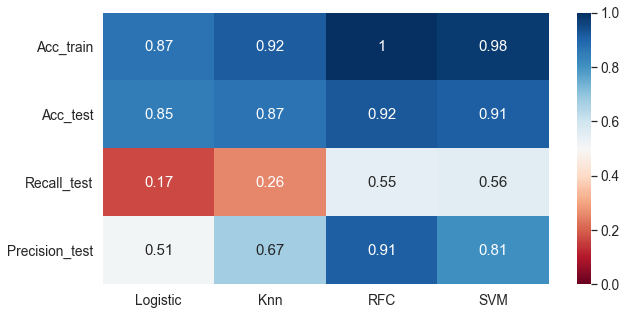

In [26]:
classifiers = [Logistic, Knn, RFC, SVM]
res = results(classifiers)


plt.figure(figsize = (10, 5))
s = sns.heatmap(res,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1)

# The predictons for the test data.

In [27]:
new_data = df_test_scaled.drop(columns=['variable_5', 'variable_12', 'variable_3', 'variable_10', 'variable_9'])
new_data = pd.get_dummies(new_data, columns=['State', 'variable_16'])
ID = df_test.index

In [28]:
new_data.head()

,variable_0,variable_1,variable_2,variable_4,variable_6,variable_7,variable_8,variable_11,variable_13,variable_14,...,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,variable_16_408,variable_16_415,variable_16_510
3000,-1.211532,-0.138135,-1.689350,0,-0.329552,1.327045,1.033682,0,-1.837166,-0.116362,...,0,0,0,0,0,0,0,1,0,0
3001,0.450149,0.793846,-1.402270,0,-0.732176,-1.624762,-1.015223,0,-0.320240,1.178455,...,0,0,0,0,0,0,0,0,0,1
3002,-0.193082,0.755545,0.770707,0,0.117455,1.286048,0.623901,0,-1.382088,-1.986654,...,0,0,0,0,0,0,0,0,1,0
3003,-0.889916,0.653410,-1.362520,0,0.173463,-1.423875,-0.605442,1,-0.522497,0.746849,...,0,0,0,0,0,0,0,1,0,0
3004,0.986175,-0.099835,0.461543,0,0.473582,0.195519,-1.015223,0,-0.269676,-1.842785,...,0,0,0,0,0,0,0,0,0,1


### Probabilities of customers to respond

In [29]:
probs = pd.DataFrame({"ID" : ID, "Probability" : SVM.predict_proba(new_data)[:,1]})\
    .sort_values('Probability', ascending=False).set_index('ID')

In [30]:
# Top 100
probs[:100]

,Probability
ID,
3180,0.999998
3185,0.996367
3257,0.977312
3250,0.970261
3306,0.967133
...,...
3270,0.104057
3148,0.102159
3171,0.101809


In [31]:
# Greater than 0.5
print(probs[probs.Probability > 0.5].shape[0])
probs[probs.Probability > 0.5]

27


,Probability
ID,
3180,0.999998
3185,0.996367
3257,0.977312
3250,0.970261
3306,0.967133
3292,0.937625
3315,0.934067
3278,0.927317
3178,0.870403
